In [127]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px


#from __future__ import print_function
from sklearn.cluster import KMeans
plt.style.use('ggplot')
%matplotlib inline



import pandas as pd
import geopandas as gpd
import geopy
from geopandas.tools import geocode
import contextily as ctx
from geopy.geocoders import Nominatim
import shapely
import matplotlib.pyplot as plt
import numpy as np
import math
import seaborn as sns
from geopandas import GeoDataFrame
from shapely.geometry import Polygon, Point
import pylab as pl
from shapely import wkt


In [128]:


df_raw = pd.read_csv('/Users/trevorban/Desktop/zri-data/acs_master11to18_clean.csv')

In [129]:
df = df_raw.copy()

In [130]:
df.dtypes

Unnamed: 0                                                       int64
zip_code                                                       float64
male_pop                                                       float64
female_pop                                                     float64
median_age                                                     float64
white_pop                                                      float64
not_us_citizen_pop                                             float64
black_pop                                                      float64
asian_pop                                                      float64
hispanic_pop                                                   float64
amerindian_pop                                                 float64
other_race_pop                                                 float64
median_income                                                  float64
income_per_capita                                              float64
pop_de

In [131]:
df.shape

(20544, 40)

In [132]:
df.isna().any()

Unnamed: 0                                                     False
zip_code                                                       False
male_pop                                                       False
female_pop                                                     False
median_age                                                     False
white_pop                                                      False
not_us_citizen_pop                                             False
black_pop                                                      False
asian_pop                                                      False
hispanic_pop                                                   False
amerindian_pop                                                 False
other_race_pop                                                 False
median_income                                                  False
income_per_capita                                              False
pop_determined_poverty_status     

In [133]:
# remove all rows that contain nulls
df2 = df.dropna(how='any',axis=0) 

In [134]:
# OR remove the three columns that contain nulls and store in 'nulls'
nulls = df[['aggregate_travel_time_to_work', 'high_school_diploma', 'bachelors_degree']]

In [135]:
df = df.drop(columns=['aggregate_travel_time_to_work', 'high_school_diploma', 'bachelors_degree'])

In [136]:
df.isna().any()

Unnamed: 0                                                     False
zip_code                                                       False
male_pop                                                       False
female_pop                                                     False
median_age                                                     False
white_pop                                                      False
not_us_citizen_pop                                             False
black_pop                                                      False
asian_pop                                                      False
hispanic_pop                                                   False
amerindian_pop                                                 False
other_race_pop                                                 False
median_income                                                  False
income_per_capita                                              False
pop_determined_poverty_status     

In [137]:
nulls['aggregate_travel_time_to_work'].isna().sum() 

96

In [138]:
nulls['high_school_diploma'].isna().sum() 

2568

In [139]:
nulls['bachelors_degree'].isna().sum() 

2568

In [140]:
df2.Time = pd.to_datetime(df2.Time)

## kmeans attempt #1

In [141]:
x = df2.iloc[:, 2:8]

In [142]:
x

,male_pop,female_pop,median_age,white_pop,not_us_citizen_pop,black_pop
2568,31982.0,32396.0,34.1,40604.0,7870.0,5493.0
2569,31982.0,32396.0,34.1,40604.0,7870.0,5493.0
2570,31982.0,32396.0,34.1,40604.0,7870.0,5493.0
2571,31982.0,32396.0,34.1,40604.0,7870.0,5493.0
2572,31982.0,32396.0,34.1,40604.0,7870.0,5493.0
...,...,...,...,...,...,...
20539,39086.0,41178.0,34.0,17942.0,11075.0,1456.0
20540,39086.0,41178.0,34.0,17942.0,11075.0,1456.0
20541,39086.0,41178.0,34.0,17942.0,11075.0,1456.0
20542,39086.0,41178.0,34.0,17942.0,11075.0,1456.0


In [143]:
kmeans = KMeans()

In [144]:
kmeans.set_params(n_clusters=5)
kmeans.fit(x)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [145]:
kmeans.cluster_centers_

array([[1.19734653e+04, 1.22281007e+04, 3.49650165e+01, 1.25393333e+04,
        2.41859406e+03, 2.70261056e+03],
       [2.17460531e+04, 2.24286813e+04, 3.57722864e+01, 2.63117506e+04,
        3.43544342e+03, 3.38090531e+03],
       [3.66499375e+04, 3.81920804e+04, 3.48062500e+01, 4.55551250e+04,
        5.60301786e+03, 5.57938393e+03],
       [2.30049847e+04, 2.35569084e+04, 3.24251908e+01, 1.21279809e+04,
        7.53425573e+03, 9.23159160e+03],
       [4.16886154e+04, 4.33860000e+04, 3.23730769e+01, 2.04932179e+04,
        1.30409359e+04, 1.36872949e+04]])

In [146]:
kmeans.labels_

array([2, 2, 2, ..., 4, 4, 4], dtype=int32)

In [147]:
#! pip install yellowbrick

In [148]:
from yellowbrick.cluster import SilhouetteVisualizer


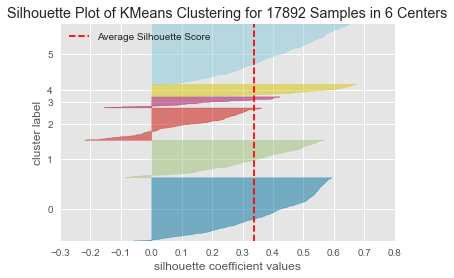

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 17892 Samples in 6 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [149]:
model = KMeans(6, random_state=42)
visualizer = SilhouetteVisualizer(model, colors='yellowbrick')

visualizer.fit(x) 
visualizer.show()   

In [150]:
x.iloc[:, 0]

2568     31982.0
2569     31982.0
2570     31982.0
2571     31982.0
2572     31982.0
          ...   
20539    39086.0
20540    39086.0
20541    39086.0
20542    39086.0
20543    39086.0
Name: male_pop, Length: 17892, dtype: float64

In [151]:
import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 50)

import numpy as np

import json # library to handle JSON files

#!conda install -c conda-forge geopy --yes #uncomment if geopy has not been installed 
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

#!conda install -c conda-forge folium=0.5.0 --yes #uncomment if folium has not been installed 
import folium # map rendering library

#!pip install BeautifulSoup4
from urllib.request import urlopen
from bs4 import BeautifulSoup as bs
import ssl
import csv

import urllib.parse
import urllib.error
import ast
import os
from urllib.request import Request, urlopen

#to extract the csv file of latitude and longitude 
import io 

#to deal with regex - regular expressions
import re

#for some plots
import matplotlib.pyplot as plt

print('Libraries imported.')

Libraries imported.


In [152]:
df2.dtypes

Unnamed: 0                                                              int64
zip_code                                                              float64
male_pop                                                              float64
female_pop                                                            float64
median_age                                                            float64
white_pop                                                             float64
not_us_citizen_pop                                                    float64
black_pop                                                             float64
asian_pop                                                             float64
hispanic_pop                                                          float64
amerindian_pop                                                        float64
other_race_pop                                                        float64
median_income                                                   

In [153]:
test = df2.iloc[:, 1:30]

In [154]:
test

,zip_code,male_pop,female_pop,median_age,white_pop,not_us_citizen_pop,black_pop,asian_pop,hispanic_pop,amerindian_pop,other_race_pop,median_income,income_per_capita,pop_determined_poverty_status,poverty,gini_index,housing_units,renter_occupied_housing_units_paying_cash_median_gross_rent,occupied_housing_units,vacant_housing_units_for_rent,median_year_structure_built,married_households,households_public_asst_or_food_stamps,male_male_households,female_female_households,children,median_rent,percent_income_spent_on_rent,owner_occupied_housing_units
2568,77494.0,31982.0,32396.0,34.1,40604.0,7870.0,5493.0,7526.0,9443.0,32.0,83.0,123782.0,43661.0,64212.0,1569.0,0.3597,21065.0,1280.0,20042.0,163.0,2004.0,15646.0,297.0,33.0,22.0,22479.0,1090.0,25.9,17344.0
2569,77494.0,31982.0,32396.0,34.1,40604.0,7870.0,5493.0,7526.0,9443.0,32.0,83.0,123782.0,43661.0,64212.0,1569.0,0.3597,21065.0,1280.0,20042.0,163.0,2004.0,15646.0,297.0,33.0,22.0,22479.0,1090.0,25.9,17344.0
2570,77494.0,31982.0,32396.0,34.1,40604.0,7870.0,5493.0,7526.0,9443.0,32.0,83.0,123782.0,43661.0,64212.0,1569.0,0.3597,21065.0,1280.0,20042.0,163.0,2004.0,15646.0,297.0,33.0,22.0,22479.0,1090.0,25.9,17344.0
2571,77494.0,31982.0,32396.0,34.1,40604.0,7870.0,5493.0,7526.0,9443.0,32.0,83.0,123782.0,43661.0,64212.0,1569.0,0.3597,21065.0,1280.0,20042.0,163.0,2004.0,15646.0,297.0,33.0,22.0,22479.0,1090.0,25.9,17344.0
2572,77494.0,31982.0,32396.0,34.1,40604.0,7870.0,5493.0,7526.0,9443.0,32.0,83.0,123782.0,43661.0,64212.0,1569.0,0.3597,21065.0,1280.0,20042.0,163.0,2004.0,15646.0,297.0,33.0,22.0,22479.0,1090.0,25.9,17344.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20539,79912.0,39086.0,41178.0,34.0,17942.0,11075.0,1456.0,2555.0,56560.0,236.0,130.0,58979.0,31249.0,79958.0,12689.0,0.4810,32077.0,898.0,28539.0,1410.0,1987.0,13769.0,3207.0,76.0,57.0,20926.0,785.0,29.4,15233.0
20540,79912.0,39086.0,41178.0,34.0,17942.0,11075.0,1456.0,2555.0,56560.0,236.0,130.0,58979.0,31249.0,79958.0,12689.0,0.4810,32077.0,898.0,28539.0,1410.0,1987.0,13769.0,3207.0,76.0,57.0,20926.0,785.0,29.4,15233.0
20541,79912.0,39086.0,41178.0,34.0,17942.0,11075.0,1456.0,2555.0,56560.0,236.0,130.0,58979.0,31249.0,79958.0,12689.0,0.4810,32077.0,898.0,28539.0,1410.0,1987.0,13769.0,3207.0,76.0,57.0,20926.0,785.0,29.4,15233.0
20542,79912.0,39086.0,41178.0,34.0,17942.0,11075.0,1456.0,2555.0,56560.0,236.0,130.0,58979.0,31249.0,79958.0,12689.0,0.4810,32077.0,898.0,28539.0,1410.0,1987.0,13769.0,3207.0,76.0,57.0,20926.0,785.0,29.4,15233.0


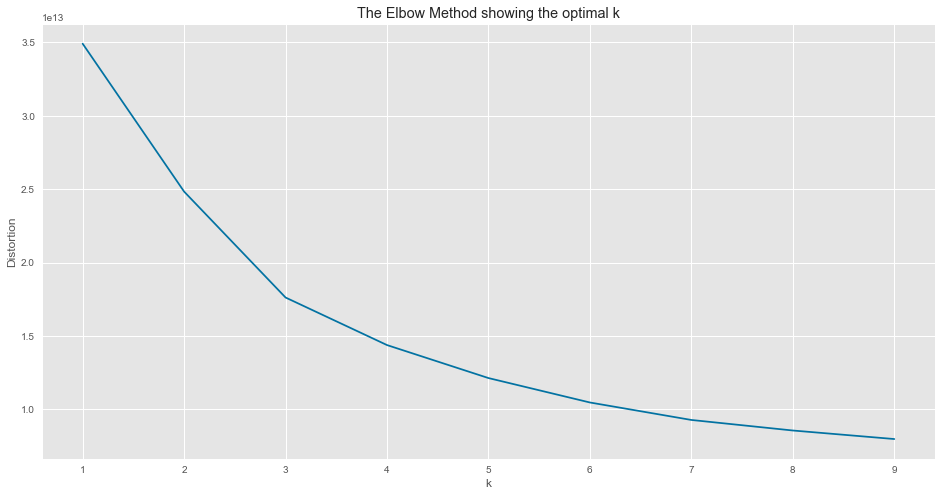

In [155]:
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(test)
    distortions.append(kmeanModel.inertia_)

plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [156]:
np.random.seed(0)
# from elbow method, set number of clusters to 6
kclusters = 6

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(test)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10]

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

In [157]:
labels = kmeans.labels_

count_arr = np.bincount(kmeans.labels_)

for i in range(6):
    print('Total occurences of ' + str(i) + ' in bin: ', count_arr[i])

Total occurences of 0 in bin:  4176
Total occurences of 1 in bin:  1884
Total occurences of 2 in bin:  3264
Total occurences of 3 in bin:  600
Total occurences of 4 in bin:  5508
Total occurences of 5 in bin:  2460


In [158]:
test['labels'] = labels

In [159]:
zips = gpd.read_file('/Users/trevorban/Downloads/tl_2019_us_zcta510/tl_2019_us_zcta510.shp')

In [160]:
zips['GEOID10'] = zips['GEOID10'].astype(int)

In [161]:
test['zip_code'] = test['zip_code'].astype(int)

In [162]:
test = gpd.GeoDataFrame(test)

In [163]:
testmap = test.merge(zips, how='inner', left_on='zip_code', right_on='GEOID10')

In [167]:
testmap

,zip_code,male_pop,female_pop,median_age,white_pop,not_us_citizen_pop,black_pop,asian_pop,hispanic_pop,amerindian_pop,other_race_pop,median_income,income_per_capita,pop_determined_poverty_status,poverty,gini_index,housing_units,renter_occupied_housing_units_paying_cash_median_gross_rent,occupied_housing_units,vacant_housing_units_for_rent,median_year_structure_built,married_households,households_public_asst_or_food_stamps,male_male_households,female_female_households,children,median_rent,percent_income_spent_on_rent,owner_occupied_housing_units,labels,ZCTA5CE10,GEOID10,CLASSFP10,MTFCC10,FUNCSTAT10,ALAND10,AWATER10,INTPTLAT10,INTPTLON10,geometry
0,77494,31982.0,32396.0,34.1,40604.0,7870.0,5493.0,7526.0,9443.0,32.0,83.0,123782.0,43661.0,64212.0,1569.0,0.3597,21065.0,1280.0,20042.0,163.0,2004.0,15646.0,297.0,33.0,22.0,22479.0,1090.0,25.9,17344.0,1,77494,77494,B5,G6350,S,105829530,587448,+29.7439478,-095.8305022,"MULTIPOLYGON (((-95.77466 29.70657, -95.77462 ..."
1,77494,31982.0,32396.0,34.1,40604.0,7870.0,5493.0,7526.0,9443.0,32.0,83.0,123782.0,43661.0,64212.0,1569.0,0.3597,21065.0,1280.0,20042.0,163.0,2004.0,15646.0,297.0,33.0,22.0,22479.0,1090.0,25.9,17344.0,1,77494,77494,B5,G6350,S,105829530,587448,+29.7439478,-095.8305022,"MULTIPOLYGON (((-95.77466 29.70657, -95.77462 ..."
2,77494,31982.0,32396.0,34.1,40604.0,7870.0,5493.0,7526.0,9443.0,32.0,83.0,123782.0,43661.0,64212.0,1569.0,0.3597,21065.0,1280.0,20042.0,163.0,2004.0,15646.0,297.0,33.0,22.0,22479.0,1090.0,25.9,17344.0,1,77494,77494,B5,G6350,S,105829530,587448,+29.7439478,-095.8305022,"MULTIPOLYGON (((-95.77466 29.70657, -95.77462 ..."
3,77494,31982.0,32396.0,34.1,40604.0,7870.0,5493.0,7526.0,9443.0,32.0,83.0,123782.0,43661.0,64212.0,1569.0,0.3597,21065.0,1280.0,20042.0,163.0,2004.0,15646.0,297.0,33.0,22.0,22479.0,1090.0,25.9,17344.0,1,77494,77494,B5,G6350,S,105829530,587448,+29.7439478,-095.8305022,"MULTIPOLYGON (((-95.77466 29.70657, -95.77462 ..."
4,77494,31982.0,32396.0,34.1,40604.0,7870.0,5493.0,7526.0,9443.0,32.0,83.0,123782.0,43661.0,64212.0,1569.0,0.3597,21065.0,1280.0,20042.0,163.0,2004.0,15646.0,297.0,33.0,22.0,22479.0,1090.0,25.9,17344.0,1,77494,77494,B5,G6350,S,105829530,587448,+29.7439478,-095.8305022,"MULTIPOLYGON (((-95.77466 29.70657, -95.77462 ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17887,78701,5682.0,3745.0,35.3,6824.0,520.0,396.0,616.0,1425.0,24.0,35.0,107190.0,99948.0,9253.0,1303.0,0.5146,7384.0,1950.0,5571.0,551.0,2004.0,1319.0,232.0,55.0,13.0,176.0,1873.0,24.8,1956.0,5,78701,78701,B5,G6350,S,4218137,263055,+30.2705689,-097.7425893,"POLYGON ((-97.75568 30.26775, -97.75513 30.269..."
17888,78701,5682.0,3745.0,35.3,6824.0,520.0,396.0,616.0,1425.0,24.0,35.0,107190.0,99948.0,9253.0,1303.0,0.5146,7384.0,1950.0,5571.0,551.0,2004.0,1319.0,232.0,55.0,13.0,176.0,1873.0,24.8,1956.0,5,78701,78701,B5,G6350,S,4218137,263055,+30.2705689,-097.7425893,"POLYGON ((-97.75568 30.26775, -97.75513 30.269..."
17889,78701,5682.0,3745.0,35.3,6824.0,520.0,396.0,616.0,1425.0,24.0,35.0,107190.0,99948.0,9253.0,1303.0,0.5146,7384.0,1950.0,5571.0,551.0,2004.0,1319.0,232.0,55.0,13.0,176.0,1873.0,24.8,1956.0,5,78701,78701,B5,G6350,S,4218137,263055,+30.2705689,-097.7425893,"POLYGON ((-97.75568 30.26775, -97.75513 30.269..."
17890,78701,5682.0,3745.0,35.3,6824.0,520.0,396.0,616.0,1425.0,24.0,35.0,107190.0,99948.0,9253.0,1303.0,0.5146,7384.0,1950.0,5571.0,551.0,2004.0,1319.0,232.0,55.0,13.0,176.0,1873.0,24.8,1956.0,5,78701,78701,B5,G6350,S,4218137,263055,+30.2705689,-097.7425893,"POLYGON ((-97.75568 30.26775, -97.75513 30.269..."


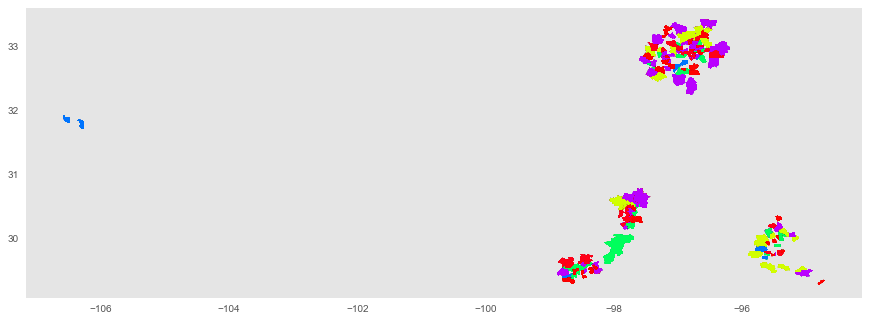

In [169]:
fig,ax = plt.subplots(figsize=(15,15))
testmap.plot(ax=ax, zorder=2, column='labels', legend=False, cmap='hsv')
ax.grid(False)
